# Least squares

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

501596.6994081075 -549.8998019168754 0.1513877128805333
4745.087199664209
6051.288176908856
8521.523173747235


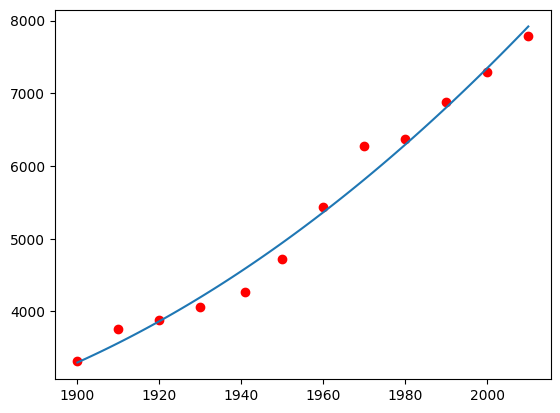

In [10]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year)
B = matrix([ones(n), year, year**2]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print(a0, a1, a2)

xx = linspace(1900, 2010, 100)
f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

26802353.274437316 -40923.77128624008 20.806645395172925 -0.0035217535289880923
4673.021194063127
6172.457116425037
8041.685336280614


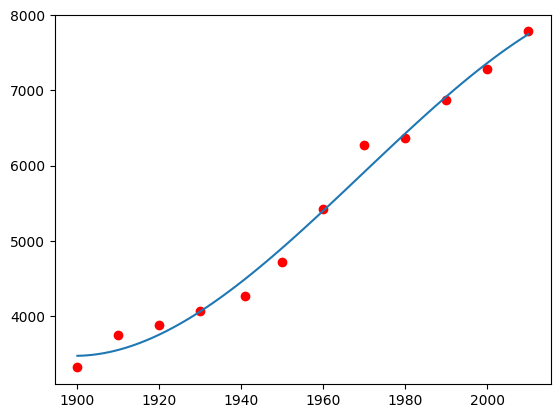

In [7]:
# reimplementing the problem changing the order of the polynomial fitting

B = matrix([ones(n), year, year**2, year**3]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
a3 = float(a[3])
print(a0, a1, a2, a3)

f = lambda x: a0 + a1*x + a2*x**2 + a3*x**3

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

[-3.52181888e-03  2.08070287e+01 -4.09245205e+04  2.68028413e+07]
4673.019846234471
6172.459357216954
8041.676461711526


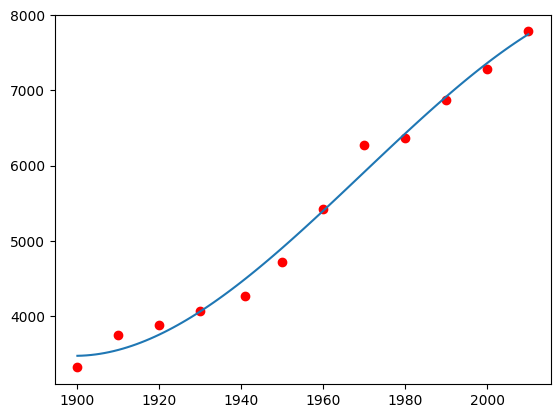

In [8]:
# comparing the results with the one obtained with the numpy polynomial fitting tool (polyfit)

a = polyfit(year, population, 3)
print(a)

f = poly1d(a)
_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))